In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [ ]:
tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/POTATO DISEASE CLASSIFICATION",
   shuffle=False,
)

Found 2162 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/POTATO DISEASE CLASSIFICATION",
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2162 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
114*32

3648

In [ ]:
for image_batch, label_batch in dataset.take(1):
       print(image_batch.shape)
       print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
       print(image_batch[0])

tf.Tensor(
[[[123. 120. 127.]
  [161. 158. 165.]
  [147. 144. 151.]
  ...
  [173. 170. 177.]
  [170. 167. 174.]
  [168. 165. 172.]]

 [[131. 128. 135.]
  [147. 144. 151.]
  [141. 138. 145.]
  ...
  [184. 181. 188.]
  [179. 176. 183.]
  [176. 173. 180.]]

 [[149. 146. 153.]
  [134. 131. 138.]
  [132. 129. 136.]
  ...
  [178. 175. 182.]
  [174. 171. 178.]
  [172. 169. 176.]]

 ...

 [[149. 146. 157.]
  [116. 113. 124.]
  [130. 127. 138.]
  ...
  [159. 159. 169.]
  [160. 160. 170.]
  [160. 160. 170.]]

 [[108. 105. 116.]
  [104. 101. 112.]
  [125. 122. 133.]
  ...
  [160. 160. 170.]
  [162. 162. 174.]
  [162. 162. 174.]]

 [[146. 143. 154.]
  [ 92.  89. 100.]
  [127. 124. 135.]
  ...
  [167. 167. 177.]
  [170. 170. 182.]
  [171. 171. 183.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_batch in dataset.take(1):
       print(image_batch[0].numpy())

[[[123. 120. 127.]
  [161. 158. 165.]
  [147. 144. 151.]
  ...
  [173. 170. 177.]
  [170. 167. 174.]
  [168. 165. 172.]]

 [[131. 128. 135.]
  [147. 144. 151.]
  [141. 138. 145.]
  ...
  [184. 181. 188.]
  [179. 176. 183.]
  [176. 173. 180.]]

 [[149. 146. 153.]
  [134. 131. 138.]
  [132. 129. 136.]
  ...
  [178. 175. 182.]
  [174. 171. 178.]
  [172. 169. 176.]]

 ...

 [[149. 146. 157.]
  [116. 113. 124.]
  [130. 127. 138.]
  ...
  [159. 159. 169.]
  [160. 160. 170.]
  [160. 160. 170.]]

 [[108. 105. 116.]
  [104. 101. 112.]
  [125. 122. 133.]
  ...
  [160. 160. 170.]
  [162. 162. 174.]
  [162. 162. 174.]]

 [[146. 143. 154.]
  [ 92.  89. 100.]
  [127. 124. 135.]
  ...
  [167. 167. 177.]
  [170. 170. 182.]
  [171. 171. 183.]]]


In [ ]:
for image_batch, label_batch in dataset.take(1):
       print(image_batch[0].shape)

(256, 256, 3)


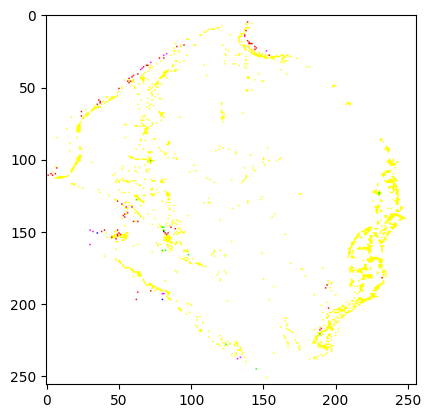

In [ ]:
for image_batch, label_batch in dataset.take(1):
       plt.imshow(image_batch[0].numpy())

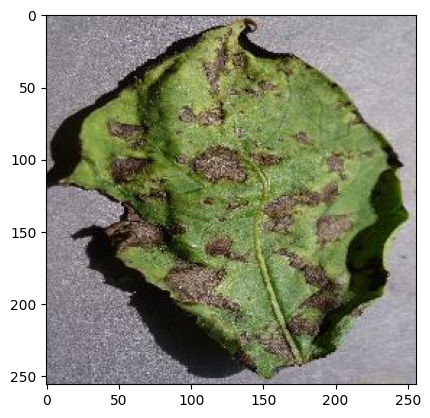

In [ ]:
for image_batch, label_batch in dataset.take(1):
       plt.imshow(image_batch[0].numpy().astype("uint8"))

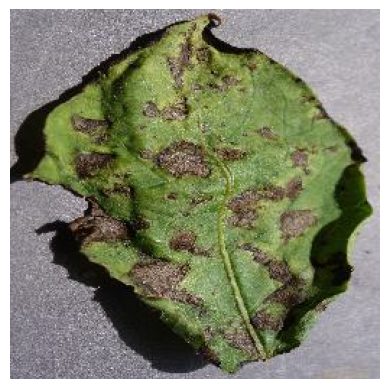

In [ ]:
for image_batch, label_batch in dataset.take(1):
       plt.imshow(image_batch[0].numpy().astype("uint8"))
       plt.axis("off")

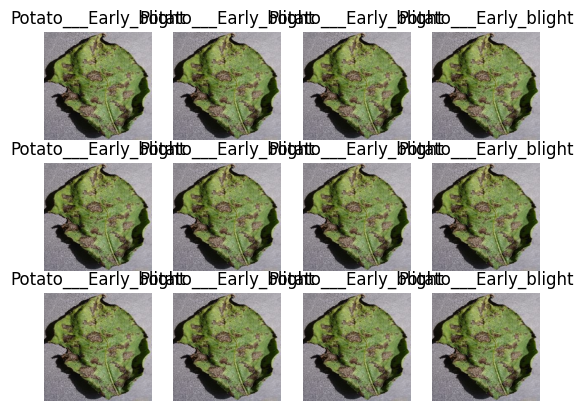

In [ ]:
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batch[0].numpy().astype("uint8"))
       plt.title (class_names[label_batch[i]])
       plt.axis("off")

In [ ]:
plt.figure(figsize=(25,20))

for image_batch, label_batch in dataset.take(1):
  for i in range(32):
       ax=plt.subplot(7,6,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))
       plt.title (class_names[label_batch[i]])
       #plt.axis("off")

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset) * train_size


54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)


54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)


14

In [ ]:
val_size = 0.1
len(dataset) * val_size


6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)


6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)


8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000, seed=None):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)


54

In [ ]:
len(val_ds)


6

In [ ]:
len(test_ds)


8

In [ ]:
train_ds = dataset.take(54)
val_ds = dataset.take(6)
test_ds = dataset.take(8)

print("The train dataset is: ", len(train_ds))
print("The test dataset is: ", len(val_ds))
print("The val dataset is: ", len(test_ds))

The train dataset is:  54
The test dataset is:  6
The val dataset is:  8


In [ ]:
def addThreeItems(a, b, c):
    item1 = a + 10      # If a = 5 → item1 = 15
    item2 = b + 100     # If b = 7.5 → item2 = 107.5
    item3 = c + 100     # If c = 500 → item3 = 600
    return item1, item2, item3

In [ ]:
var1, var2, var3 = addThreeItems(5, 17.5, 5)
print("The 1st item is:", var1)
print("The 2nd item is:", var2)
print("The 3rd item is:", var3)



The 1st item is: 15
The 2nd item is: 117.5
The 3rd item is: 105


In [ ]:
def get_dataset_partitions_tf(potato, train_split=0.7, val_split=0.1, test_split=0.2, shuffle=True, shuffle_size=10000):
    ds_size = len(potato)
    train_size = int(ds_size * train_split)   # 68 * 0.7 = 47.6 → 47
    val_size = int(ds_size * val_split)       # 68 * 0.1 = 6.8 → 6
    train_ds = potato.take(train_size)
    val_ds = potato.take(val_size)
    test_ds = potato.take(ds_size - (train_size + val_size))
    return train_ds, val_ds, test_ds

In [ ]:
train, val, test = get_dataset_partitions_tf(dataset)
print("Train:", len(train))
print("Val:", len(val))
print("Test:", len(test))


Train: 47
Val: 6
Test: 15


In [ ]:
def printing_numbers(item, a = 10, b = 20, c = 30):
    print("item:", item)          # Prints the value of 'item'
    a = a + b                     # 10 + 20 = 30
    b = b + c                     # 20 + 30 = 50
    c = c + 100                   # 30 + 100 = 130
    return a, b, c                # returns the tuple (30, 50, 130)


In [ ]:
item1, item2, item3 = printing_numbers(100000)
print("Item 1:", item1)   # 30
print("Item 2:", item2)   # 50
print("Item 3:", item3)   # 130


item: 100000
Item 1: 30
Item 2: 50
Item 3: 130


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = "adam",  # Helps the model learn better and faster
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # How wrong the prediction is
    metrics = ["accuracy"]  # What to track while training
)


In [ ]:
model.compile(
    optimizer = "adam",  # Helps the model learn better and faster
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # How wrong the prediction is
    metrics = ["accuracy"]  # What to track while training
)

history = model.fit(
    train_ds,           # Training dataset
    epochs=50,          # Run 50 times over the whole data
    batch_size=32,      # 32 images are processed at a time
    verbose=1,          # Show progress bar
    validation_data=val_ds  # Dataset to test the model after each epoch
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.4381 - loss: 20.1612 - val_accuracy: 0.9792 - val_loss: 0.0618
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.8038 - loss: 0.5098 - val_accuracy: 0.9844 - val_loss: 0.0354
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8595 - loss: 0.3131 - val_accuracy: 0.8802 - val_loss: 0.2870
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9051 - loss: 0.2113 - val_accuracy: 0.9010 - val_loss: 0.2695
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8874 - loss: 0.2738 - val_accuracy: 0.9167 - val_loss: 0.2522
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.9122 - loss: 0.2362 - val_accuracy: 0.8542 - val_loss: 0.3862
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8277 - loss: 1.0248 - val_accuracy: 0.9167 - val_loss: 0.2538
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.8841 - loss: 0.2760 - val_accuracy: 0.9740 - 

In [ ]:
scores = model.evaluate(test_ds)
scores


In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 50
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    print("The label batch is:", len(labels_batch.numpy()))
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy() # Corrected index to 0
    print("First image to predict: ")
    plt.imshow(first_image)
    print("First image’s actual label: ", class_names[first_label])
    # print(first_image)

In [ ]:
#heloooooooooooo
